In [ ]:
# This example is created on 16:30 19/11/2024 for examplifying a recent change in overlap setting.
# Author: Zhengdi Liu (Email: zhengdi.liu@monash.edu)

# Description:
# The previous overlap condition required it to be smaller than the window_size, limiting 
# flexibility when search_area_size > window_size. By changing the condition to require overlap 
# to be smaller than search_area_size, the spacing between window centers can be adjusted more 
# flexibly, allowing overlaps up to search_area_size - 1.

# This changing allows create an one-pixel-dense velocity field when the search_area_size is larger 
# than window_size.

# Belows are four examples that illustrate the change.

In [1]:
from openpiv import tools, pyprocess, validation, filters, scaling 

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import imageio

In [2]:
frame_a  = tools.imread( 'openpiv/data/test1/exp1_001_a.bmp' )
frame_b  = tools.imread( 'openpiv/data/test1/exp1_001_b.bmp' )

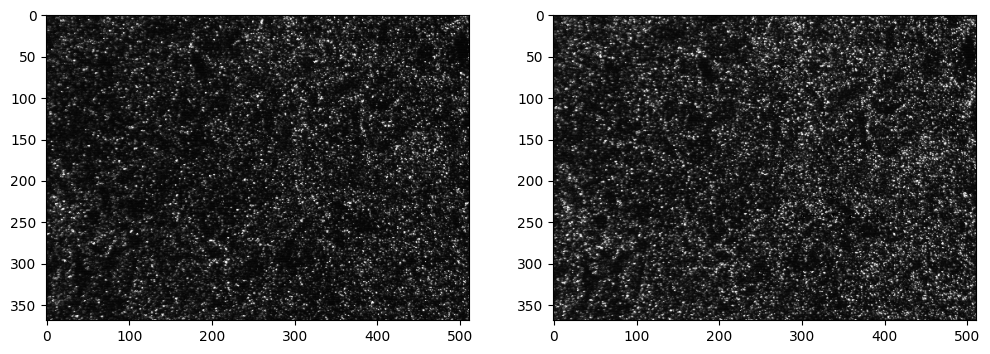

In [3]:
fig,ax = plt.subplots(1,2,figsize=(12,10))
ax[0].imshow(frame_a,cmap=plt.cm.gray)
ax[1].imshow(frame_b,cmap=plt.cm.gray)

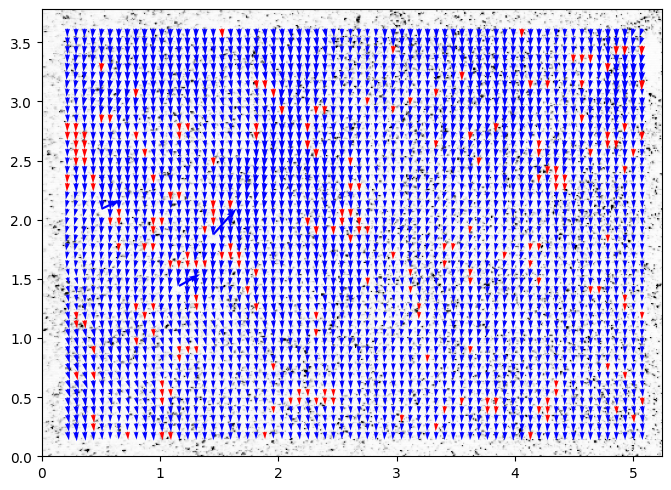

In [4]:
# This is the most dense velocity field we can get if the overlap is not allowed to be larger than search_area_size.
# This problem is more obvious when search_area_size is much larger.

winsize = 32
searchsize = 38
overlap = 31
dt = 0.02


u0, v0, sig2noise = pyprocess.extended_search_area_piv(frame_a.astype(np.int32), 
                                                       frame_b.astype(np.int32), 
                                                       window_size=winsize, 
                                                       overlap=overlap, 
                                                       dt=dt, 
                                                       search_area_size=searchsize, 
                                                       sig2noise_method='peak2peak')

x, y = pyprocess.get_coordinates( image_size=frame_a.shape, 
                                 search_area_size=searchsize, 
                                 overlap=overlap )

flags = validation.sig2noise_val( sig2noise, 
                                 threshold = 1.05 )

u2, v2 = filters.replace_outliers( u0, v0, 
                                   flags,
                                   method='localmean', 
                                   max_iter=3, 
                                   kernel_size=3)

x, y, u3, v3 = scaling.uniform(x, y, u2, v2, 
                               scaling_factor = 96.52 ) # 96.52 microns/pixel

x, y, u3, v3 = tools.transform_coordinates(x, y, u3, v3)

tools.save('exp1_001.txt', x, y, u3, v3, flags)

fig, ax = plt.subplots(figsize=(8,8))
tools.display_vector_field('exp1_001.txt', 
                           ax=ax, scaling_factor=96.52, 
                           scale=200, # scale defines here the arrow length
                           width=0.0035, # width is the thickness of the arrow
                           on_img=True, # overlay on the image
                           image_name="openpiv/data/test1/exp1_001_a.bmp");

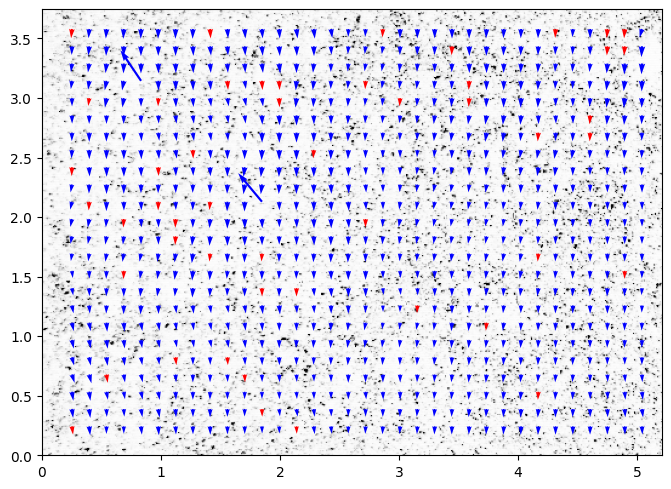

In [5]:
# This is the showcase when search_area_size is 45 and window_size is 32. Under this condition, the velocity field become less dense.

winsize = 32
searchsize = 45
overlap = 31
dt = 0.02


u0, v0, sig2noise = pyprocess.extended_search_area_piv(frame_a.astype(np.int32), 
                                                       frame_b.astype(np.int32), 
                                                       window_size=winsize, 
                                                       overlap=overlap, 
                                                       dt=dt, 
                                                       search_area_size=searchsize, 
                                                       sig2noise_method='peak2peak')

x, y = pyprocess.get_coordinates( image_size=frame_a.shape, 
                                 search_area_size=searchsize, 
                                 overlap=overlap )

flags = validation.sig2noise_val( sig2noise, 
                                 threshold = 1.05 )

u2, v2 = filters.replace_outliers( u0, v0, 
                                   flags,
                                   method='localmean', 
                                   max_iter=3, 
                                   kernel_size=3)

x, y, u3, v3 = scaling.uniform(x, y, u2, v2, 
                               scaling_factor = 96.52 ) # 96.52 microns/pixel

x, y, u3, v3 = tools.transform_coordinates(x, y, u3, v3)

tools.save('exp1_001.txt', x, y, u3, v3, flags)

fig, ax = plt.subplots(figsize=(8,8))
tools.display_vector_field('exp1_001.txt', 
                           ax=ax, scaling_factor=96.52, 
                           scale=200, # scale defines here the arrow length
                           width=0.0035, # width is the thickness of the arrow
                           on_img=True, # overlay on the image
                           image_name="openpiv/data/test1/exp1_001_a.bmp");

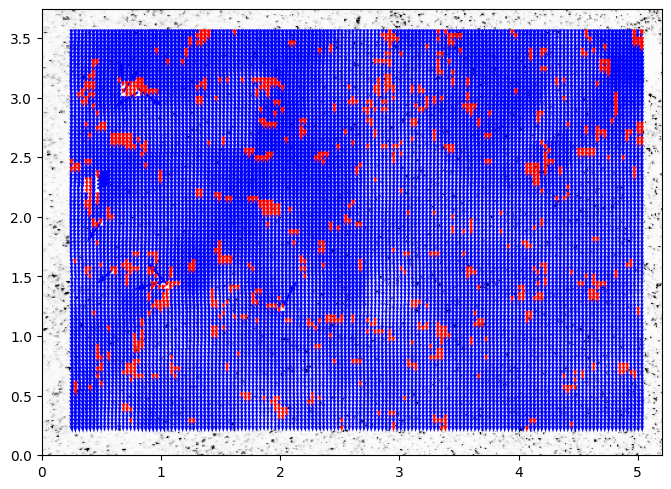

In [6]:
# When overlap is allowed to be larger than window_size but not larger than search_area_size, we can get a more dense velocity field.
# If we want, we can even get a pixel by pixel velocity field.



winsize = 32
searchsize = 48 
overlap = 45 
dt = 0.02 


u0, v0, sig2noise = pyprocess.extended_search_area_piv(frame_a.astype(np.int32), 
                                                       frame_b.astype(np.int32), 
                                                       window_size=winsize, 
                                                       overlap=overlap, 
                                                       dt=dt, 
                                                       search_area_size=searchsize, 
                                                       sig2noise_method='peak2peak')

x, y = pyprocess.get_coordinates( image_size=frame_a.shape, 
                                 search_area_size=searchsize, 
                                 overlap=overlap )

flags = validation.sig2noise_val( sig2noise, 
                                 threshold = 1.1 )

u2, v2 = filters.replace_outliers( u0, v0, 
                                   flags,
                                   method='localmean', 
                                   max_iter=3, 
                                   kernel_size=3)

x, y, u3, v3 = scaling.uniform(x, y, u2, v2, 
                               scaling_factor = 96.52 ) # 96.52 microns/pixel

x, y, u3, v3 = tools.transform_coordinates(x, y, u3, v3)

tools.save('exp1_001.txt', x, y, u3, v3, flags)

fig, ax = plt.subplots(figsize=(8,8))
tools.display_vector_field('exp1_001.txt', 
                           ax=ax, scaling_factor=96.52, 
                           scale=250, # scale defines here the arrow length
                           width=0.0035, # width is the thickness of the arrow
                           on_img=True, # overlay on the image
                           image_name="openpiv/data/test1/exp1_001_a.bmp");

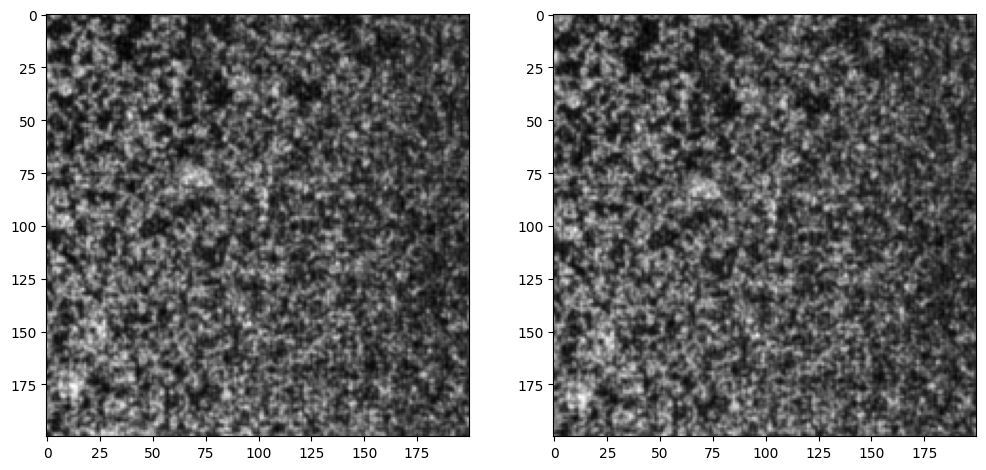

In [7]:
# In our usage, the dt is always set at 1. So actually we get the displacement. We

frame_a  = tools.imread( 'openpiv/data/test1/1-1.tif' )  # This is a test picture Zhengdi added into the folder
frame_b  = tools.imread( 'openpiv/data/test1/1-2.tif' )  # This is a test picture Zhengdi added into the folder

fig,ax = plt.subplots(1,2,figsize=(12,10))
ax[0].imshow(frame_a,cmap=plt.cm.gray)
ax[1].imshow(frame_b,cmap=plt.cm.gray)

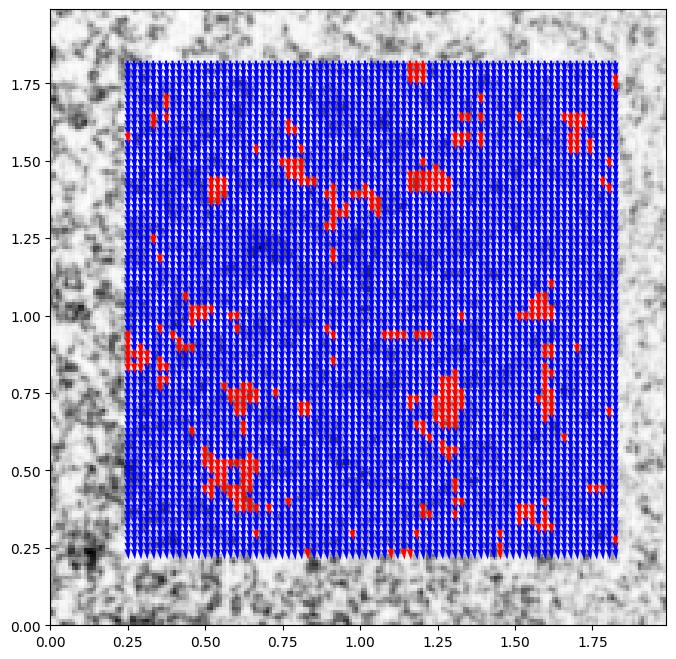

In [8]:
# We want a very fine displacement field to calculate the displacement gradient between area and area so that we can observe the 
# deformation.

winsize = 32
searchsize = 48 
overlap = 46
dt = 1


u0, v0, sig2noise = pyprocess.extended_search_area_piv(frame_a.astype(np.int32), 
                                                       frame_b.astype(np.int32), 
                                                       window_size=winsize, 
                                                       overlap=overlap, 
                                                       dt=dt, 
                                                       search_area_size=searchsize, 
                                                       sig2noise_method='peak2peak')

x, y = pyprocess.get_coordinates( image_size=frame_a.shape, 
                                 search_area_size=searchsize, 
                                 overlap=overlap )

flags = validation.sig2noise_val( sig2noise, 
                                 threshold = 1.1 )

u2, v2 = filters.replace_outliers( u0, v0, 
                                   flags,
                                   method='localmean', 
                                   max_iter=3, 
                                   kernel_size=3)

x, y, u3, v3 = scaling.uniform(x, y, u2, v2, 
                               scaling_factor = 96.52 ) # 96.52 microns/pixel

x, y, u3, v3 = tools.transform_coordinates(x, y, u3, v3)

tools.save('exp1_001.txt', x, y, u3, v3, flags)

fig, ax = plt.subplots(figsize=(8,8))
tools.display_vector_field('exp1_001.txt', 
                           ax=ax, scaling_factor=96.52, 
                           scale=3, # scale defines here the arrow length
                           width=0.0035, # width is the thickness of the arrow
                           on_img=True, # overlay on the image
                           image_name="openpiv/data/test1/1-1.tif");